In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas import DataFrame
import ijson
from pandas.io.json import json_normalize
from wordcloud import WordCloud, STOPWORDS 
import warnings
warnings.filterwarnings("ignore")

In [2]:
basepath1='../input/personal-mobile-usage-statistics/amuda-research-addiction-export.json'
with open(basepath1) as f:
    df = json.load(f)

In [3]:
user1=df['Users']['1j6eBfE29NgBf7DoDqR9NJRc7iH2']['Smartphone']['AppTimeUsage']
data1=[i for i in user1]

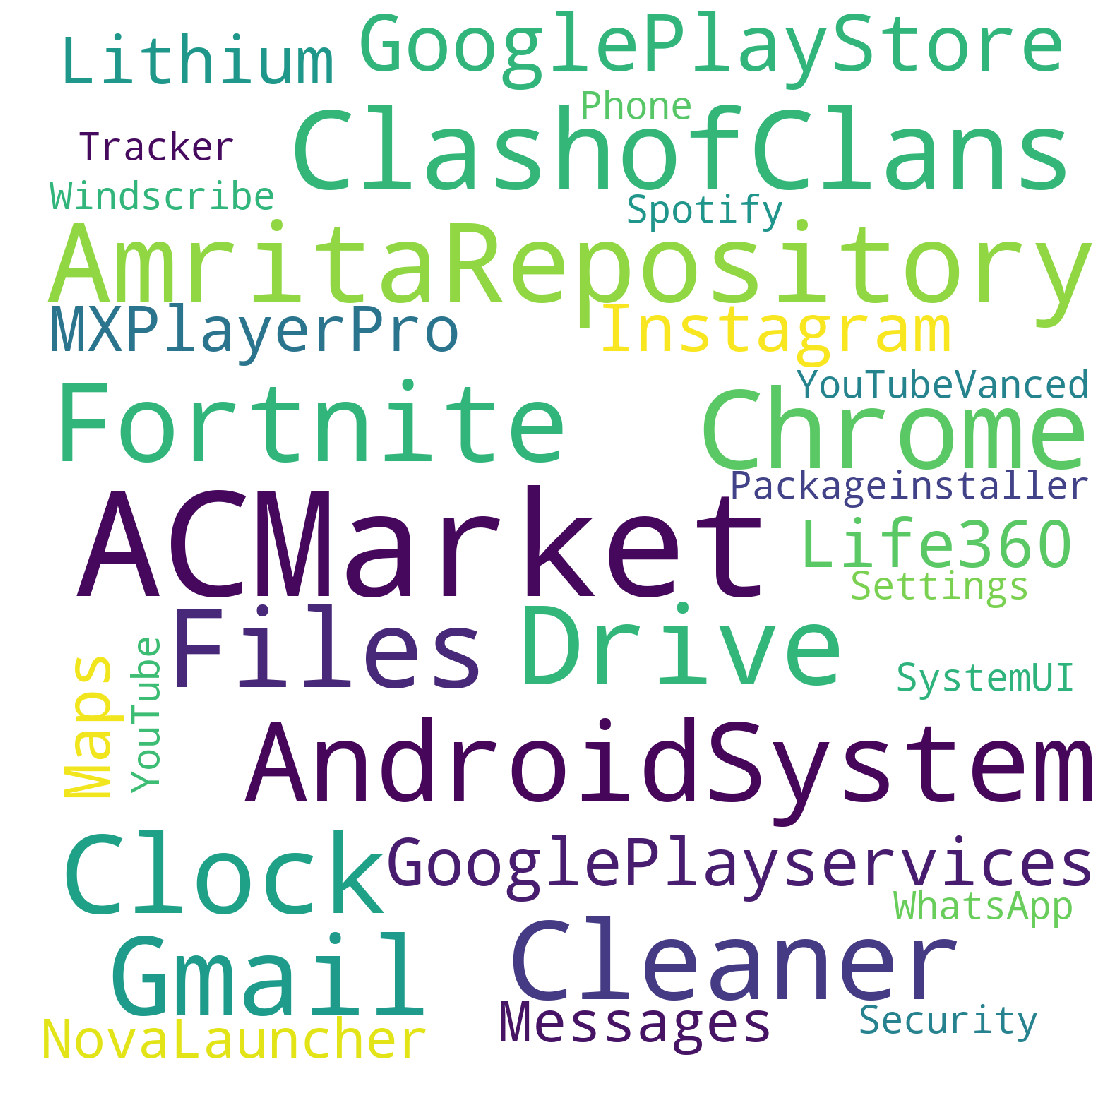

In [4]:
comment_words = ' '
stopwords = set(STOPWORDS)
for i in range(len(data1)): 
    data1[i] = data1[i].replace(" ","")
for words in data1: 
    comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 1500, height = 1500, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (15, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


In [5]:
appname=[]
time=[]
for k,v in df['Users']['1j6eBfE29NgBf7DoDqR9NJRc7iH2']['Smartphone']['AppTimeUsage'].items():
    appname.append(k)
    count=0
    for kk,vv in v.items():
        for kkk,vvv in vv.items():
            if(kkk=="Time Used"):
                count+=vvv
    time.append(count)
time=np.array(time)
time=(time//60000)+1
appname=np.array(appname)
ind=np.arange(0,31)+1
user1=pd.DataFrame({'appname':appname,'time':time},index=ind) 
# user1 consists the overall timing of all the apps used grouped by the apps used

User1 Statistics Please double tap to zoom in to look the app name


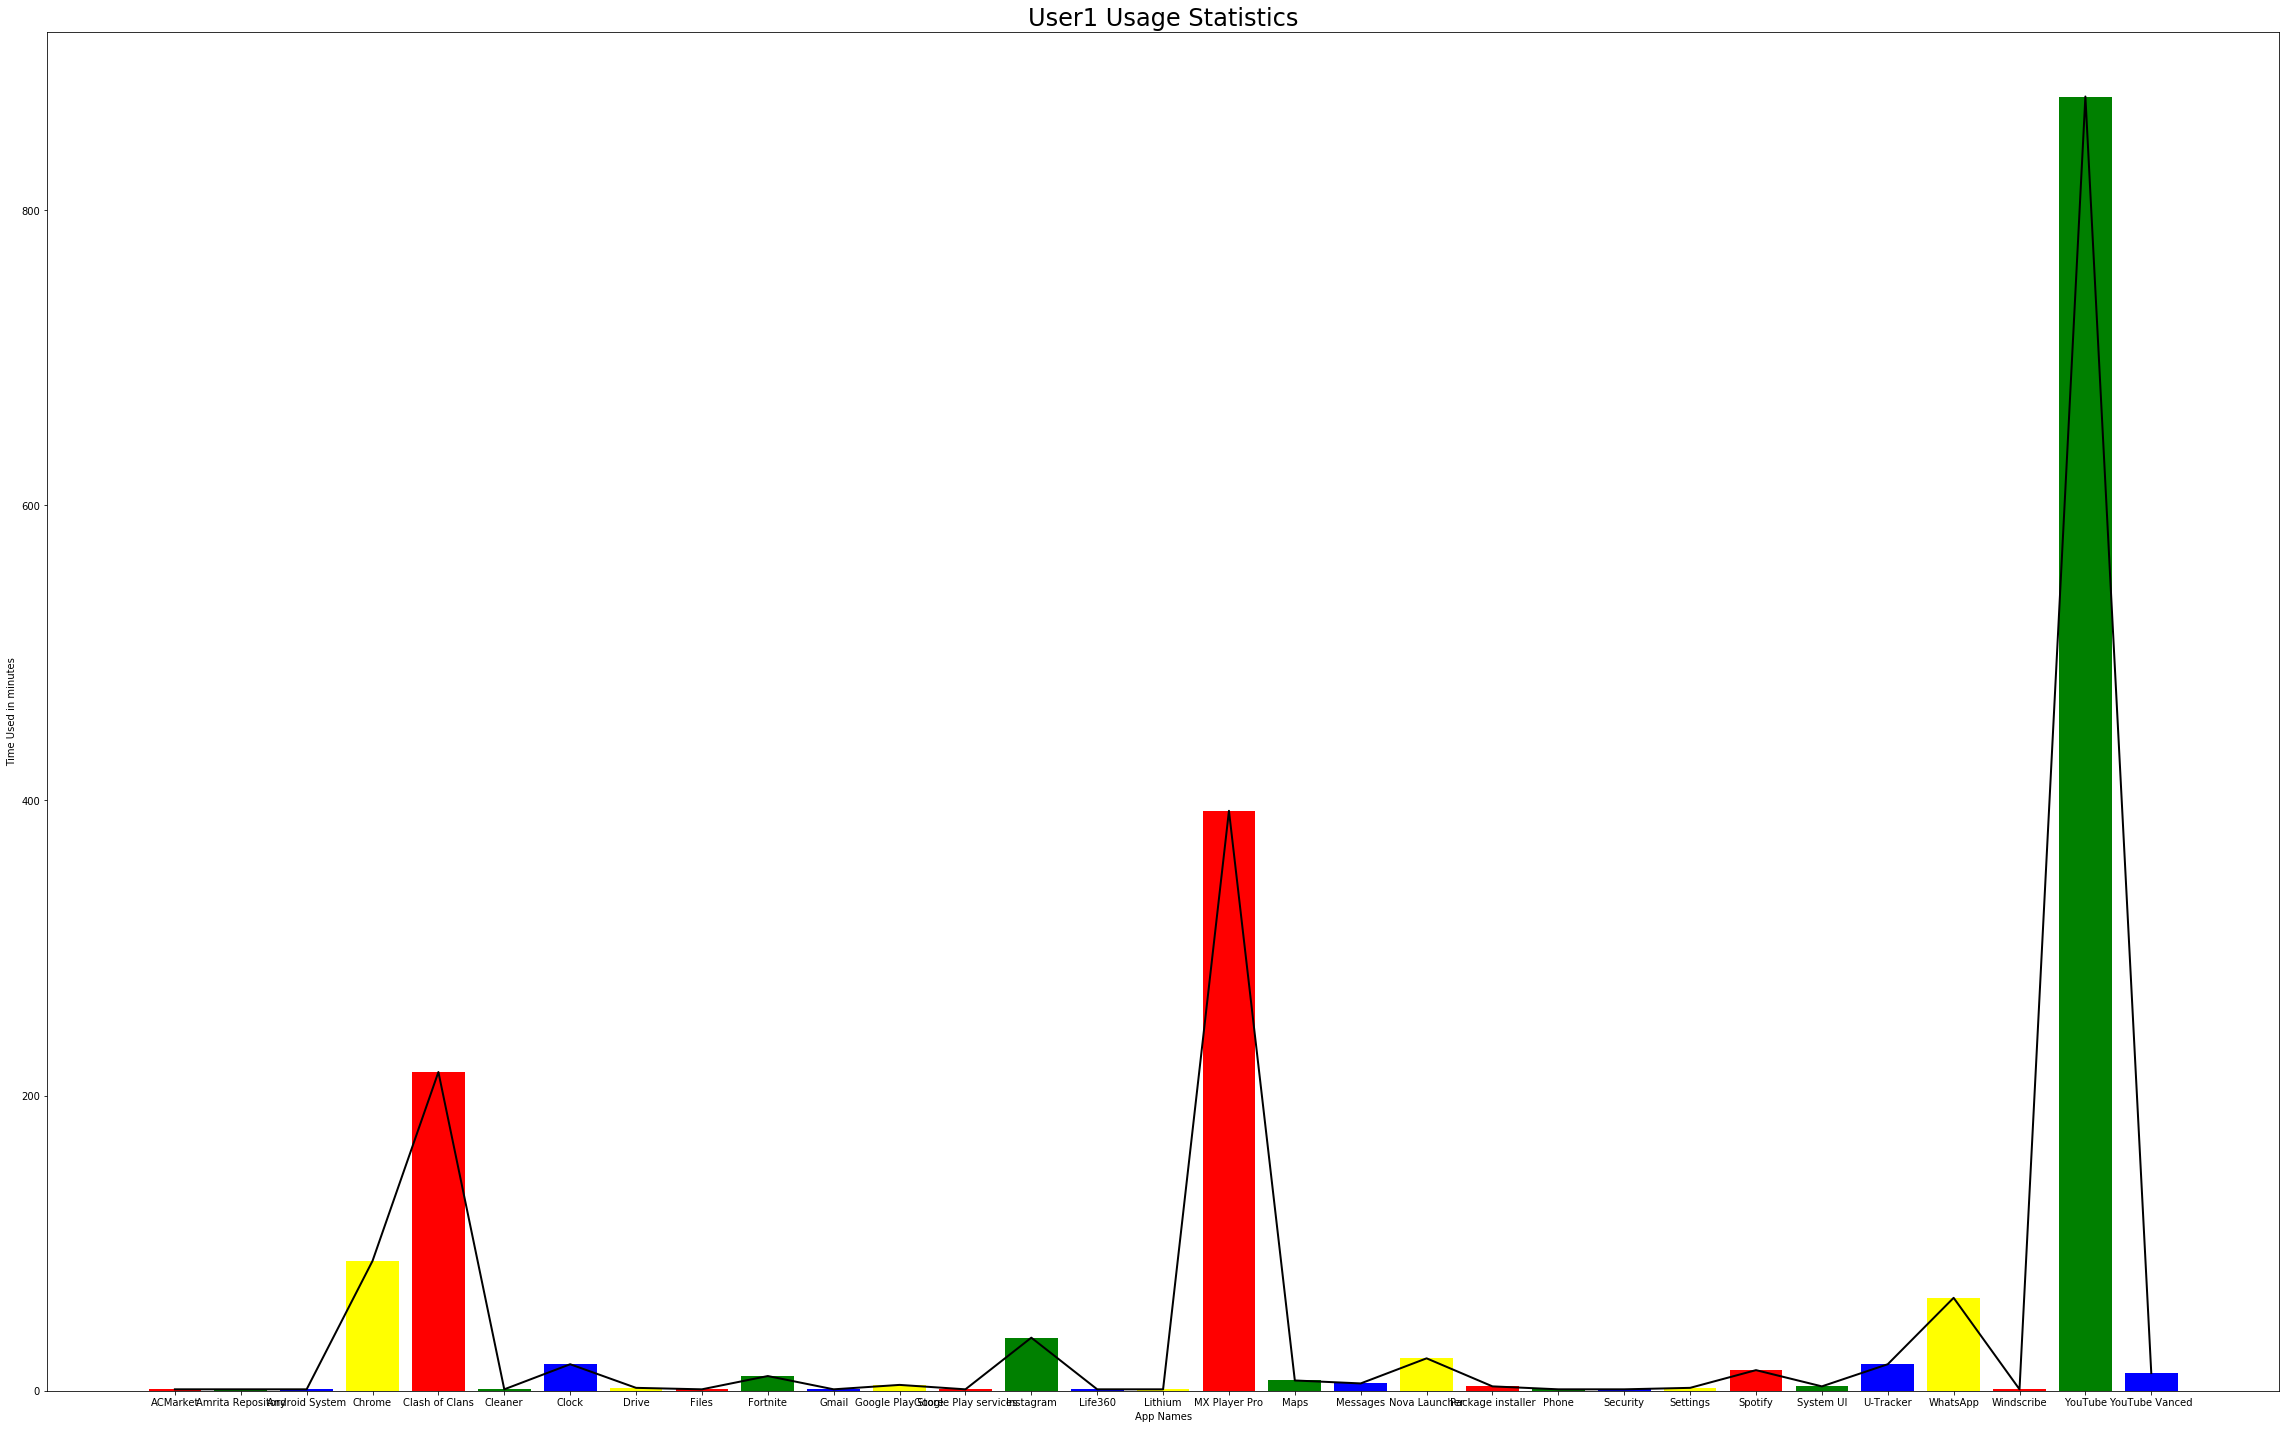

In [6]:
print('User1 Statistics Please double tap to zoom in to look the app name')
plt.figure(figsize=(40, 25))
ax=plt.subplot(1,1,1)

left = np.arange(0,len(time))
  
# heights of bars 
height = time
  
# labels for bars 
tick_label = appname
  
# plotting a bar chart
plt.plot(time,color='black',linewidth=2.0)
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['red', 'green','blue','yellow']) 
  
plt.rcParams.update({'font.size': 20})
# naming the x-axis 
plt.xlabel('App Names') 
# naming the y-axis 
plt.ylabel('Time Used in minutes') 
# plot title 
plt.title('User1 Usage Statistics') 
  
# function to show the plot 
plt.show() 

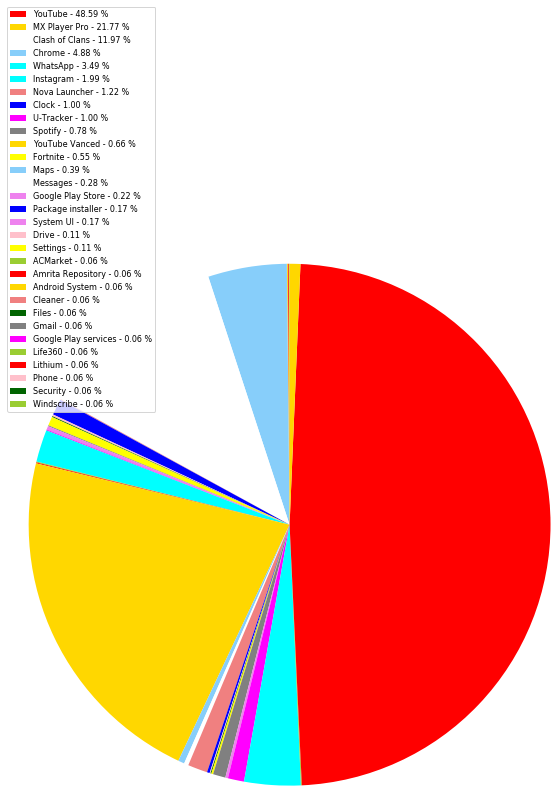

In [7]:
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue', 
          'white','lightcoral','blue','pink', 'darkgreen', 
          'yellow','grey','violet','magenta','cyan']

x=user1['appname'].tolist()
y=np.array(user1['time'].tolist())
porcent = 100.*y/y.sum()
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=3)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

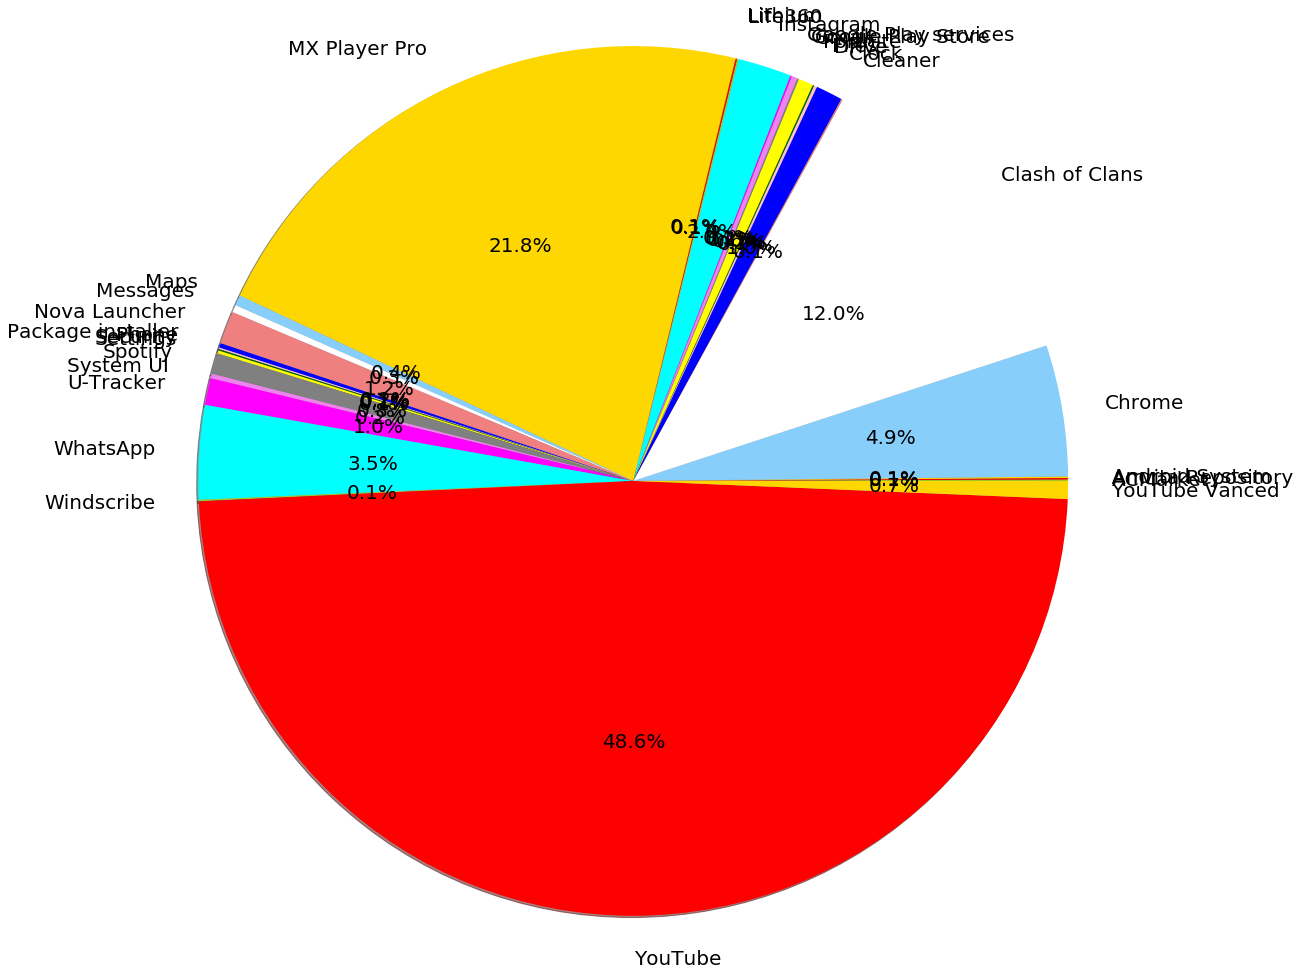

In [8]:
plt.pie(user1['time'], labels=user1['appname'], autopct='%1.1f%%', shadow=True, 
        colors=colors, startangle=0, radius=5)

plt.show()

The problem of overlapping could be removed by clubbing apps with lower contribution and showing them as others.

In [9]:
timeframe=[]
for k,v in df['Users']['r3jYUgZHrBTTlsGDy2VPrKYIL9j2']['Smartphone']['Unlocks'].items():
    timeframe.append(k)
import datetime
timstamp=[]
for i in range(len(timeframe)):
    timstamp.append(datetime.datetime.strptime(timeframe[i], '%Y %m %d %H:%M:%S'))
freqhr=[]
for i in range(len(timstamp)):
    freqhr.append(timstamp[i].hour)

This is the number of unlocks in the given hours


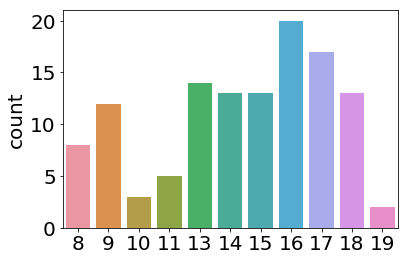

In [10]:
index=np.arange(0,24)
sns.countplot(freqhr)
print('This is the number of unlocks in the given hours')

From here we are able to visualise around 4pm the number of unlocks is highest for the user

Since we know that User spends **48.6%** of the screen time in **Youtube**.This is the plot of his monthly usage details 

In [11]:
print('The List Of Users Using this app')
for k,v in df['Users'].items():
    print(k)

The List Of Users Using this app
1j6eBfE29NgBf7DoDqR9NJRc7iH2
8o7itQCq9uQdWHuoeeOFwUxKs7u2
8rAw8mdXq8TYHSrPaNflfmkyP4i1
9kXV4vaSdMd7MwVubEne98wuC0A3
BOnHl1xFgZWiymR3DxN5scRRvaY2
BVIf6qW2amPIBuvS2jhlNVNF1xy2
DxWxNut73XgzAR1brppFQXwkM7E3
FMCYHtQpt6gviQAMYGwQn8nBcfm1
OJNSMfsYbYTvHYIP0uhdzPnfLcz1
X1QWD3U96pYeXJ8quIL71RbDqof2
X1XTMUzA19bFqSZJd0HhHMu3FGs2
ZHpstdmyife0LL2LW4nqiwF4DzI3
jOfVQKnWIMTMWplBBxSPVuM73Cg2
kR3IBC4YW5euTACrHJd29aHpO8Q2
lmF7VgWqllgKEBUuQOa6lrQPlQw2
r3jYUgZHrBTTlsGDy2VPrKYIL9j2
rZzxvjNIBDaVGEq3KCbKmRoKV5S2


In [12]:
appname=[]
time=[]
for k,v in df['Users']['BVIf6qW2amPIBuvS2jhlNVNF1xy2']['Smartphone']['AppTimeUsage'].items():
    appname.append(k)
    count=0
    for kk,vv in v.items():
        for kkk,vvv in vv.items():
            if(kkk=="Time Used"):
                count+=vvv
    time.append(count)
time=np.array(time)
time=(time//60000)+1
appname=np.array(appname)
ind=np.arange(0,194)+1
user1=pd.DataFrame({'appname':appname,'time':time},index=ind) 
# user1 consists the overall timing of all the apps used grouped by the apps used

In [13]:
user1=user1.sort_values(by=['time'])
user1.iloc[-1]

appname    Instagram
time          631993
Name: 95, dtype: object

This user spends lots of time on instagram.Let us check on his daily usage

In [14]:
tt=[0]*32
for k,v in df['Users']['BVIf6qW2amPIBuvS2jhlNVNF1xy2']['Smartphone']['AppTimeUsage']['Instagram'].items():
    obj=datetime.datetime.strptime(k, '%Y %m %d %H:%M:%S')
    if(obj.month==7):
        tt[obj.day]+=df['Users']['BVIf6qW2amPIBuvS2jhlNVNF1xy2']['Smartphone']['AppTimeUsage']['Instagram'][k]['Time Used']
for i in range(len(tt)):
    tt[i]=tt[i]/3600000


Text(0.5, 1.0, 'Time spent in instagram in the month JULY')

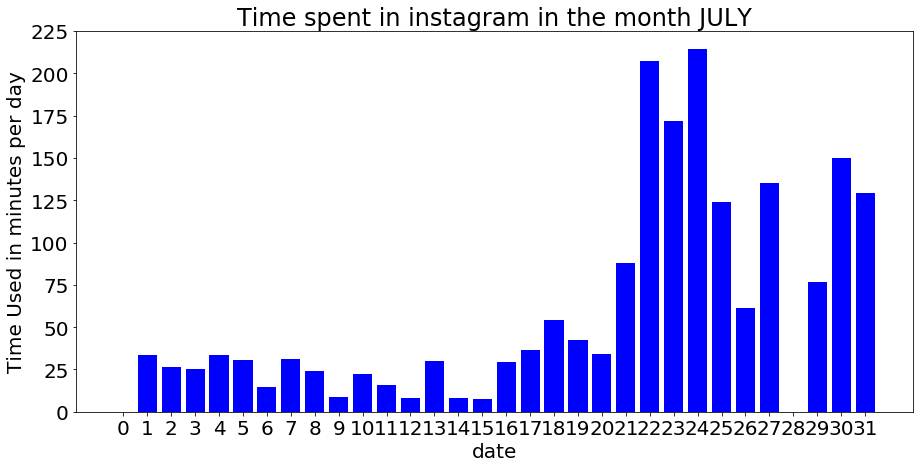

In [15]:

plt.figure(figsize=(15, 7))
ax=plt.subplot(1,1,1)

left = np.arange(0,32)+1
  
# heights of bars 
height = tt
  
# labels for bars 
tick_label = np.arange(0,32)
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['blue']) 
  
plt.rcParams.update({'font.size': 20})
# naming the x-axis 
plt.xlabel('date') 
# naming the y-axis 
plt.ylabel('Time Used in minutes per day') 
# plot title 
plt.title('Time spent in instagram in the month JULY') 

Text(0.5, 1.0, 'Time spent in instagram in the month JULY')

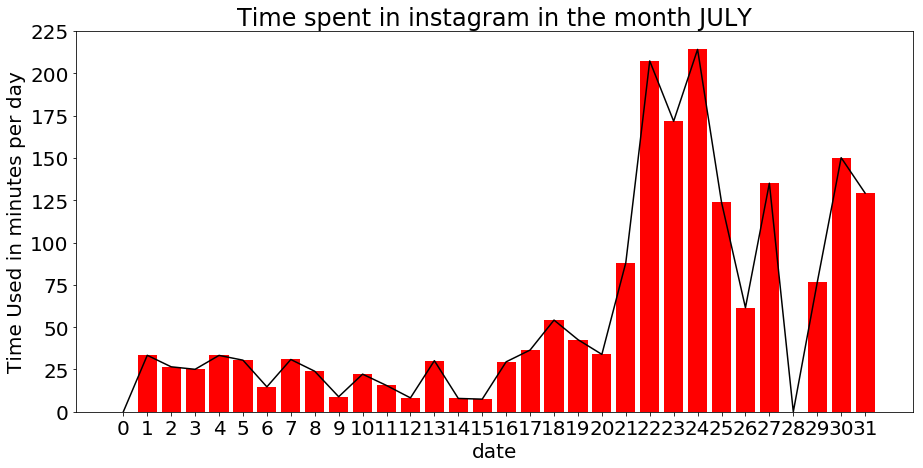

In [16]:
plt.figure(figsize=(15, 7))
ax=plt.subplot(1,1,1)

left = np.arange(0,32)
  
# heights of bars 
height = tt
  
# labels for bars 
tick_label = np.arange(0,32)
  
# plotting a bar chart 
plt.plot(tt,color='black') 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['red']) 
plt.rcParams.update({'font.size': 20})
# naming the x-axis 
plt.xlabel('date') 
# naming the y-axis 
plt.ylabel('Time Used in minutes per day') 
# plot title 
plt.title('Time spent in instagram in the month JULY') 

In [17]:
#df['Users']['BVIf6qW2amPIBuvS2jhlNVNF1xy2']['Smartphone']['AppTimeUsage']['Instagram'].items():['Time Used']
tottime=[0]*17
i=0
days = [0]*17
for k,v in df['Users'].items():
    s = []
    try:
        for k1,v1 in df['Users'][k]['Smartphone']['AppTimeUsage'].items():
            for k2, v2 in v1.items():
                obj=datetime.datetime.strptime(k2, '%Y %m %d %H:%M:%S')
                t2 = str(obj.year)+" "+str(obj.month)+" "+str(obj.day)
                s.append(t2)
                tottime[i]+=v2['Time Used']
    except:
        continue
    days[i] = len(set(s))
    i+=1

for i in range(len(days)):
    if(days[i]!=0):
        tottime[i]/=days[i]
        tottime[i]/=3600000

    

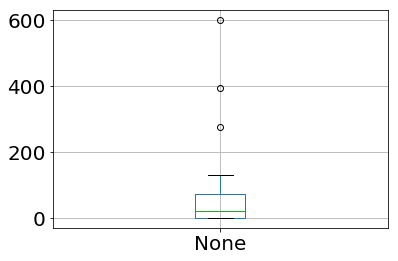

In [18]:
tottime=np.array(tottime)
tottime=pd.Series(tottime)
tottime.plot.box(grid=True)
        

Average Time of different users spending time in a day